In [1]:
from PIL import Image
import lmdb
import io

In [2]:
f = open('/home/allen/67.jpg', 'rb')
img_str = f.read()

In [3]:
lmdb_env = lmdb.open("/media/allen/mass/DB/imagenet_lmdb", map_size=int(1e12))
lmdb_txn = lmdb_env.begin(write=True)


key = 'two_people.jpg'
lmdb_txn.put(key.encode(), img_str)
lmdb_txn.commit()

In [2]:
test_lmdb_env = lmdb.open("/media/allen/mass/DB/imagenet_lmdb")
test_lmdb_txn = test_lmdb_env.begin()

key = 'two_people.jpg'
raw = test_lmdb_txn.get(key.encode())
img_byte = io.BytesIO(raw)
# test_img = Image.frombytes('RGB', (1024, 682), raw)
# test_img

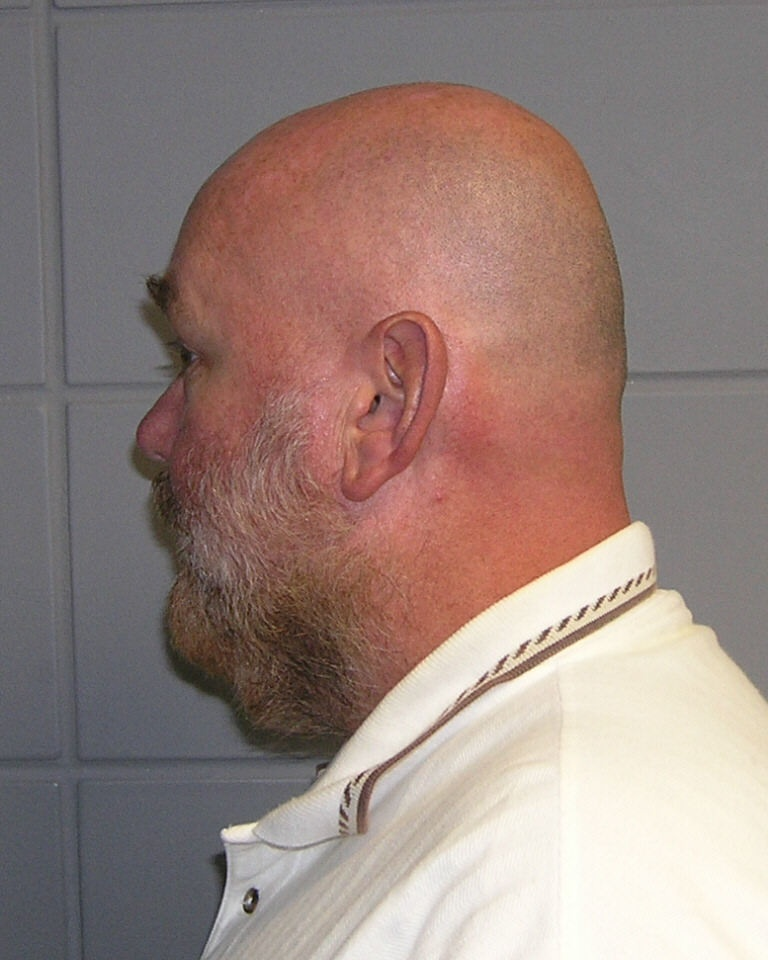

In [3]:
Image.open(img_byte)

In [9]:
str(img_str)

'b\'\\xff\\xd8\\xff\\xe0\\x00\\x10JFIF\\x00\\x01\\x01\\x01\\x01,\\x01,\\x00\\x00\\xff\\xe1\\x00OExif\\x00\\x00II*\\x00\\x08\\x00\\x00\\x00\\x01\\x00\\x0e\\x01\\x02\\x00-\\x00\\x00\\x00\\x1a\\x00\\x00\\x00\\x00\\x00\\x00\\x00Two people standing on white wall background.\\xff\\xe1\\x03\\x00http://ns.adobe.com/xap/1.0/\\x00\\t<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\\n\\t\\t<rdf:Description rdf:about="" xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/" xmlns:Iptc4xmpCore="http://iptc.org/std/Iptc4xmpCore/1.0/xmlns/" xmlns:GettyImagesGIFT="http://xmp.gettyimages.com/gift/1.0/" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:plus="http://ns.useplus.org/ldf/xmp/1.0/" xmlns:iptcExt="http://iptc.org/std/Iptc4xmpExt/2008-02-29/" photoshop:Credit="Getty Images" GettyImagesGIFT:AssetID="611216316" >\\n<dc:creator><rdf:Seq><rdf:li>themacx</rdf:li></rdf:Seq></dc:creator><dc:description><rdf:Alt><rdf:li xml:lang="x-default">Two people standing on white wall background.<